In [ ]:
Gonzalo Cardenal Antolin 53815827J

# Tarea 1.3: Comportamientos de modelos discretos densodependientes

Estudiar el comportamiento del modelo de Hassell (1975):

$$
p_{n+1} = \frac{R_0}{(1+ap_n)^b}p_n, \qquad \; \text{(} R_0, a > 0\; \text{y}\;  b \geq 0\text{)}
$$

siguiendo el análisis que de él se hace en Britton (2003) pags. 4-8. Utilizar las herramientas de Python utilizadas en el cuaderno Modelo_May_1975.ipynb

Explicar porqué el siguiente reescalamiento de la población (cambio de variable) facilita el análisis sin perder generalidad  

$x_n = ap_n$


$$
x_{n+1} = \frac{R_0}{(1+x_n)^b}x_n
$$


$$
f(x) = \frac{R_0}{(1+x)^b}x \qquad F(x) = \frac{R_0}{(1+x)^b}
$$

_________
M. P. Hassell (1975). Density-Dependence in Single-Species Populations. Journal of Animal Ecology,Vol. 44, No. 1 (Feb., 1975), pp. 283-295. https://www.jstor.org/stable/3863

N. Britton (2003). Essential Mathematical Biology. Springer-Verlag London. DOI:10.1007/978-1-4471-0049-2

In [69]:
import matplotlib.pyplot as plt
import numpy as np

Gráficas de la función de producción, así como la bisectriz

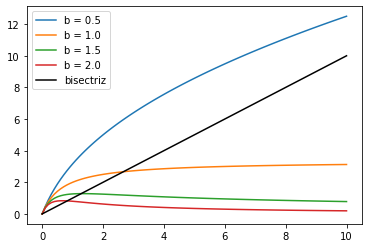

In [70]:
#Condiciones iniciales
R_0=5
a=1.5
v=np.linspace(0.5,2,4)
for b in v:
    x = np.linspace(0,10,100) #vector con 100 elementos empezando en 0 y termina en 40
    x_b = np.linspace(0,10,100)
    y_p = (R_0/((1+a*x)**b))*x
    plt.plot(x, y_p, label = 'b = ' + str(b))

plt.plot(x_b, x_b, '-', color ='black', label = 'bisectriz')
plt.legend()
plt.show()

El modelo de Hassel es un modelo que estudia poblaciones con ciclos anuales en un tiempo discreto $ => $ poblaciones de insectos. En este modelo densodependiente, se definen 3 parámetros: $ a $, $b$ y $R_0$. Este modelo tiene en cuenta la competencia intraespecífica por medio del parámetro $b$. Este parámetro representa la competencia intraespecie por los recursos (generalmente comida y espacio) proyectando distintos comportamientos del sistema en función de su valor. El análisis en función del valor de $b$ está realizado posteriormente.

Observando los comportamientos de $b$ nos encontramos 3 escenarios:

- $0<b<1$ (línea azul) se produce una infra-compensación de la competición y la población sigue creciendo indefinidamente cada generación.

- $b=1$, se da una situación compensación exacta de competición ideal donde los recursos están idealmente distrubuidos. La población crece hacia un máximo. 

- $b>1$, situación de sobre-compensación donde los recursos no estan distruidos equitativamente. La población crece hasta un máximo y posteriomente desciende con el paso de las generaciones. 

Concluimos que b está relacionado con el grado de desigualdad de la distribución de los recursos. A mayor b, mayor desigualdad.

El análisis del modelo puede simplificarse definiendo $ X_n = a*N_n $ , como se realizará posteriormente.

Realmente, este modelo puede ser determinista, no tener en cuenta la influencia de predadores o condiciones abióticas como el tiempo. Sin embargo, el papel de estos modelos densodependientes es investigar si los supuestos simples realizados sobre como es regulada la población son respaldados por los datos.

### Función de producción y producción per capita 
Con $R_0$ , $a$ y $b$ >1

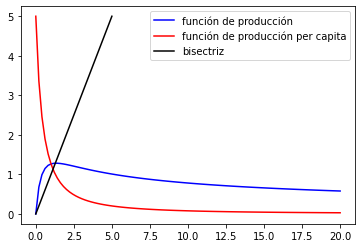

In [71]:
#Condiciones iniciales
R_0=5
a=1.5
b=1.5
x = np.linspace(0,20,100) #vector con 100 elementos empezando en 0 y termina en 40
x_b = np.linspace(0,5,100)
y_p = (R_0/((1+a*x)**b))*x
y_pc = (R_0/((1+a*x)**b))
plt.plot(x, y_p, color ='blue', label = 'función de producción')
plt.plot(x, y_pc, color ='red', label = 'función de producción per capita')
plt.plot(x_b, x_b, '-', color ='black', label = 'bisectriz')
plt.legend()
plt.show()

Ejemplo de situación con sobre-compensación

In [72]:
import sympy as sp
sp.init_printing() #para escribir expresiones algebraicas con letra de libro.

In [73]:
x = sp.symbols('x') #parece una redundancia pero no, en la variable x de py se está almacenando la variable simbólica x
R_0, a, b = sp.symbols('R_0 a b', positive = True)

In [74]:
f_p = (R_0/((1+a*x)**b))*x

In [75]:
sp.solve(f_p - x, x)

Al resolver algebráicamente la función del modelo, obtenemos los valores de x para los que $P_n+_1 = P_n$, es decir, las soluciones de equilibrio. Por tanto, $P_e = P_n = P_n+_1$ que se obtiene de despejar  $
p_{e} = \frac{R_0}{(1+ap_n)^b}p_e $.
Los valores de x que corresponden con los puntos de equilibrio son la solución trivial $0$ y $\frac{R_0^\frac{1}{b}-1}{a} $.


In [76]:
ptos_fijos = sp.solve(f_p - x, x)
ptos_fijos = [sp.simplify(ptos_fijos[0], inverse = True), sp.simplify(ptos_fijos[1], inverse = True)]
ptos_fijos

Estudiamos la estabilidad de los $P_e$ con la derivada

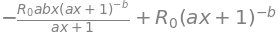

In [77]:
f_p.diff(x)

In [78]:
sp.simplify(f_p.diff(x))

In [79]:
sp.simplify(f_p.diff(x).subs(x, 0))

Para la solución trivial, la pendiente solo depende de $R_0$

In [80]:
sp.simplify(f_p.diff(x).subs(x, ((R_0**(1/b)-1)/a)))

Observamos que el comportamiento del sistema para la solución de equilibrio no trivial es independiente de $a$, lo que nos permite simplificar las funciones de producción y p.c con el cambio de variable $ x_n = ap_n $. Así, el sistema solo depende de $R_0$(nºdescencientes adultos o ratio de reproducción básico) y $b$(competencia por los recursos).

Realizamos el estudio con el cambio de variable

In [81]:
f_pr = (R_0/((1+x)**b))*x

In [82]:
ptos_fijos = sp.solve(f_pr - x, x)
ptos_fijos

In [83]:
ptos_fijos = sp.solve(f_pr - x, x)
ptos_fijos = [sp.simplify(ptos_fijos[0], inverse = True), sp.simplify(ptos_fijos[1], inverse = True)]
ptos_fijos

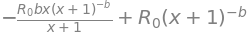

In [84]:
f_pr.diff(x)

In [85]:
sp.simplify(f_pr.diff(x))

In [86]:
pendiente = [f_pr.diff(x).subs(x, 0), sp.simplify(f_pr.diff(x).subs(x, ((R_0**(1/b))-1)))]
pendiente

Observamos que los $P_e$ son los mismos

Ahora, tenemos que estudiar los comportamientos del modelo en base a los parámetros $b$ y $R_0$ cerca de los puntos de equilibrio. Para estudiar estos comportamientos analizamos donde la derivada cambia el comportamiento del modelo que son los intervalos ($-infinito$,$-1$),($-1$,$0$),($0$,$1$) y ($1$,$infinito$)

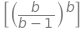

In [89]:
sp.solve((R_0**(-1/b))*b + 1 - b, R_0)

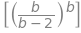

In [88]:
sp.solve((R_0**(-1/b))*b + 1 - b + 1, R_0)

<ipython-input-97-2cdb31910740>:3: RuntimeWarning: invalid value encountered in power
  y_1 = ((R_0/(R_0-1))**R_0)
<ipython-input-97-2cdb31910740>:4: RuntimeWarning: invalid value encountered in power
  y_2 = ((R_0/(R_0-2))**R_0)


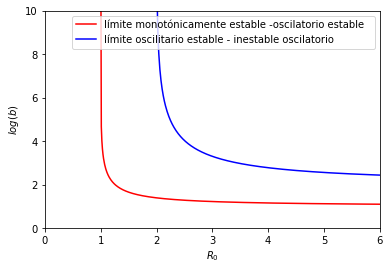

In [97]:
R_0 = np.linspace(0,10000,1000000)

y_1 = ((R_0/(R_0-1))**R_0)
y_2 = ((R_0/(R_0-2))**R_0)


plt.plot(R_0, np.log(y_1), color ='red', label = 'límite monotónicamente estable -oscilatorio estable  ')
plt.plot(R_0, np.log(y_2), color ='blue', label = 'límite oscilitario estable - inestable oscilatorio ')
plt.xlim(0,6)
plt.ylim(0,10)
plt.xlabel('$ R_0 $' )
plt.ylabel ('$ log(b) $')

plt.legend()
plt.show()

Gráfica que ilustra las dos curvas que delimitan los diferentes comportamientos del sistema en base a los parámetros $b$ y $R_0$ cerca de $x^*$ no trivial.

#### Resumen de estabilidad del modelo para los $P_e$

De los resultados anteriores deducimos que para $b>2$:
- La solución del modelo de Hassell es estable y se acerca monotónicamente al equilibrio $Pe =$ ${R_0^\frac{1}{b}-1}$ siempre que $1 <R_0 <(\frac{b}{b - 1})^b $. *en este caso a partir de $b>1$ se cumple.
- La solución del modelo de Hassell es estable y oscila a medida que se acerca al equilibrio $Pe =$ ${R_0^\frac{1}{b}-1}$ siempre que $(\frac{b}{b - 1})^b <R_0 <(\frac{b}{b - 2})^b $.
- La solución del modelo de Hassell es inestable y oscila a medida que se aleja del equilibrio $Pe =$ ${R_0^\frac{1}{b}-1}$ siempre que $R_0> (\frac{b}{b - 2})^b$.

Además, para el caso de la solución trivial $x*=0$, $ f'(0) $ es $R_0$ luego, independientemente del valor de b:
- $0<R_0<=1$ la población tiende monotónicamente estable al x* trivial 0
- $R_0>1$ el sistema es inestable y se aleja monotónicamente 

### Análisis gráfico del modelo mediante gráficos de telaraña

Los siguientes gráficos de telaraña representan el crecimiento de las distintas poblaciones en base al resumen de estabilidad del modelo realizado previamente.

In [23]:
from telaranas import *

In [24]:
def f_pr(x):
    return (R_0/((1+x)**b))*x

##### Caso 1: $1<R_0<$$(\frac{b}{b - 1})^b$  $ $ $b>1$

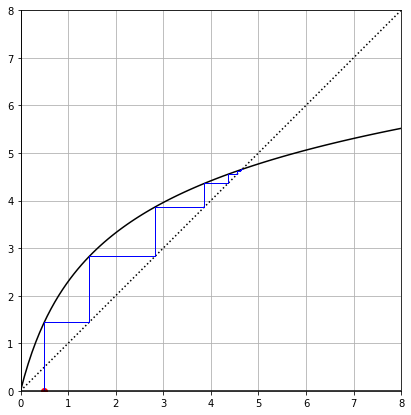

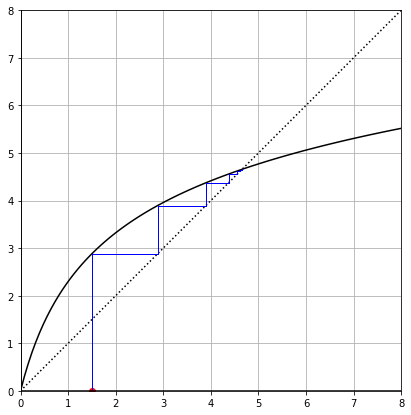

In [33]:
R_0 = 4 ; b = 0.8
cobweb_f(f_pr, 0.5, 20, a = 0, b = 8)
cobweb_f(f_pr, 1.5, 20, a = 0, b = 8)

En este caso el sistema tiende monotónicamente al $P_e=4.65$ $ x^* = 4^\frac{1}{0.8} - 1 = 4.65 $



##### Caso 2: $(\frac{b}{b - 1})^b$ $<R_0<$$(\frac{b}{b - 2})^b$  $ $ $b>2$

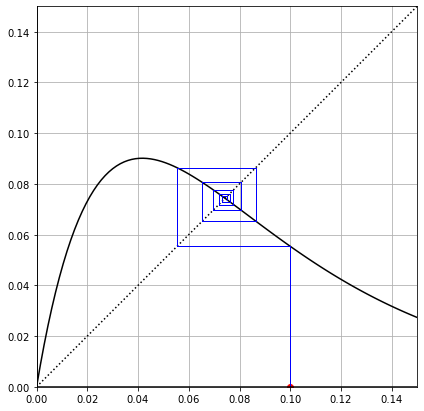

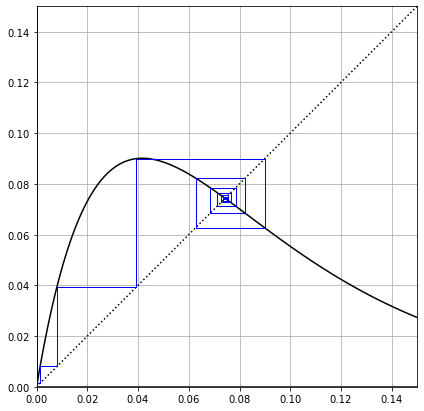

In [41]:
b = 25 ; R_0 =  6
cobweb_f(f_pr, 0.1, 10, a = 0, b = 0.15)
cobweb_f(f_pr, 1, 40, a = 0, b = 0.15)

Para los valores de $R_0$ entre 2.775 y 8.041 se produce un comportamiento oscilatorio estable al $ x^* = 6^\frac{1}{25} - 1 = 0.074 $

##### Caso 3: $(\frac{b}{b - 2})^b$ $>R_0  $ $ b>2$

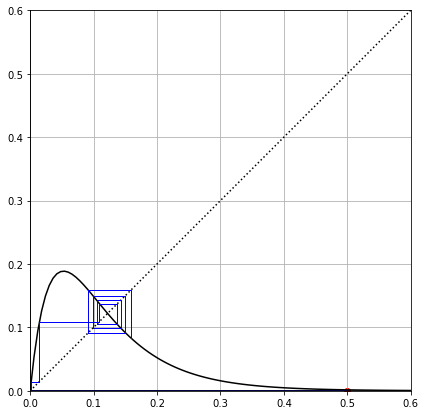

In [27]:
b = 20
R_0 = 10
cobweb_f(f_pr, 0.5, 10, a = 0, b = 0.6)

Para $R_0>8.225$ el sistema es inestable y oscila alejándose del $x*$ no trivial

Para estos 3 casos, como $R_0>1$ todos los sistemas son inestables y se alejan monotónicamente respecto a $x*=0$.

##### Caso 4: $0<R_0<1$  $ $ $ b>0$

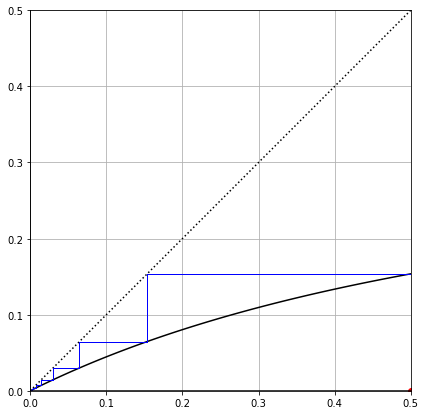

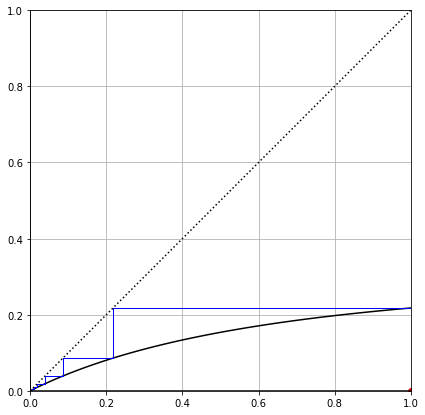

In [28]:
R_0 = 0.5 ; b = 1.2
cobweb_f(f_pr, 0.5, 20, a = 0, b = 0.5)
cobweb_f(f_pr, 1, 20, a = 0, b = 1)

El sistema crece monotónicamente a $x*=0$, en el caso de $ x^* = R^\frac {1}{b} -1 $ la derivada f'(x*) > 1, por tanto el equilibrio es inestable y se aleja del punto de equilibrio monotónicamente.

##### Caso 5: $R_0>1$  $ $ $ 0<b<=1$

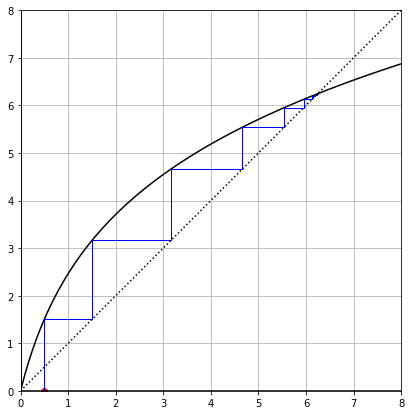

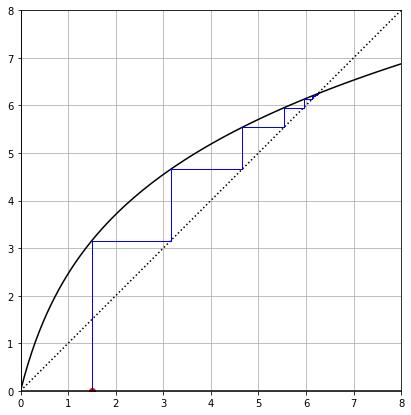

In [73]:
R_0 = 4 ; b = 0.7
cobweb_f(f_pr, 0.5, 20, a = 0, b = 8)
cobweb_f(f_pr, 1.5, 20, a = 0, b = 8)

A pesar de que esta situación no se contempla en el resumen de estabilidad del sistema, para una situación $0<b<=1$ como comentábamos al principio del cuaderno se da una situación de infra-compensación. La población crece monotónicamente a $x*$ no trivial.

##### Caso 6: Movimiento caótico

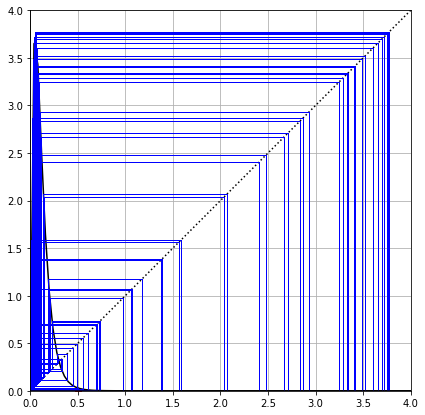

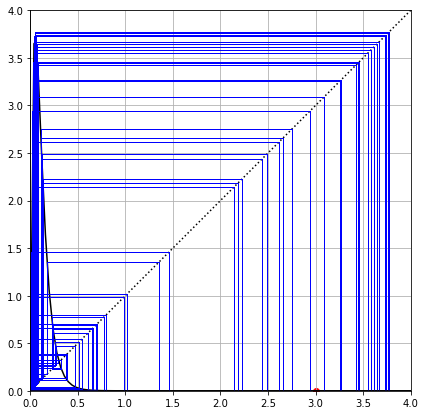

In [37]:
R_0 = 200 ; b = 20
cobweb_f(f_pr, 0.5, 200, a = 0, b = 4)
cobweb_f(f_pr, 3, 200, a = 0, b = 4)

Como podemos observar,para $b$ y $R_0$ muy grandes el sistema adquiere un comportamiento caóticio inestable sobre los dos puntos de equilibrio. Para $x*$ no trivial, $f'(x*) < -1$ luego las soluciones del modelo dinámico discreto oscilan alejándose del equilibrio (equilibrio inestable).

#### Bibliografía

- Britton (2003) pags. 4-8

- https://jmahaffy.sdsu.edu/courses/s00a/math121/lectures/qual_discrete/qualdiscrete.html#Hassell
Math 121 - Calculus for Biology I
Spring Semester, 2004 
More Applications of Nonlinear Dynamical Systems